In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
from collections import Counter 

In [2]:
# Load dataset
df = pd.read_csv("BreastEW.csv")

In [3]:
# Rename columns for clarity
df.columns = [f'feature_{i}' for i in range(df.shape[1] - 1)] + ['label']

In [4]:

# Separate features and labels
X = df.drop('label', axis=1)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
n_clusters = 2
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_clusters = cluster_model.fit_predict(X_scaled)

In [7]:
# Count the number of unique predicted clusters
unique_clusters = np.unique(y_clusters)
print(f"\nNumber of predicted clusters: {len(unique_clusters)}")


Number of predicted clusters: 2


In [8]:
# Check how many data points are in each cluster
# After clustering
y_clusters = cluster_model.fit_predict(X_scaled)

# Count how many data points are in each cluster
cluster_counts = Counter(y_clusters)
print("Data points in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data points")

Data points in each cluster:
Cluster 1: 325 data points
Cluster 0: 242 data points


In [9]:
# Check if the number of predictions matches the number of data points
if len(y_clusters) == len(df):
    print("✅ Yes, the dataset and predicted result have the same number of data points.")
else:
    print("❌ No, mismatch in data points: Dataset has", len(df), "but predictions have", len(y_clusters))

✅ Yes, the dataset and predicted result have the same number of data points.


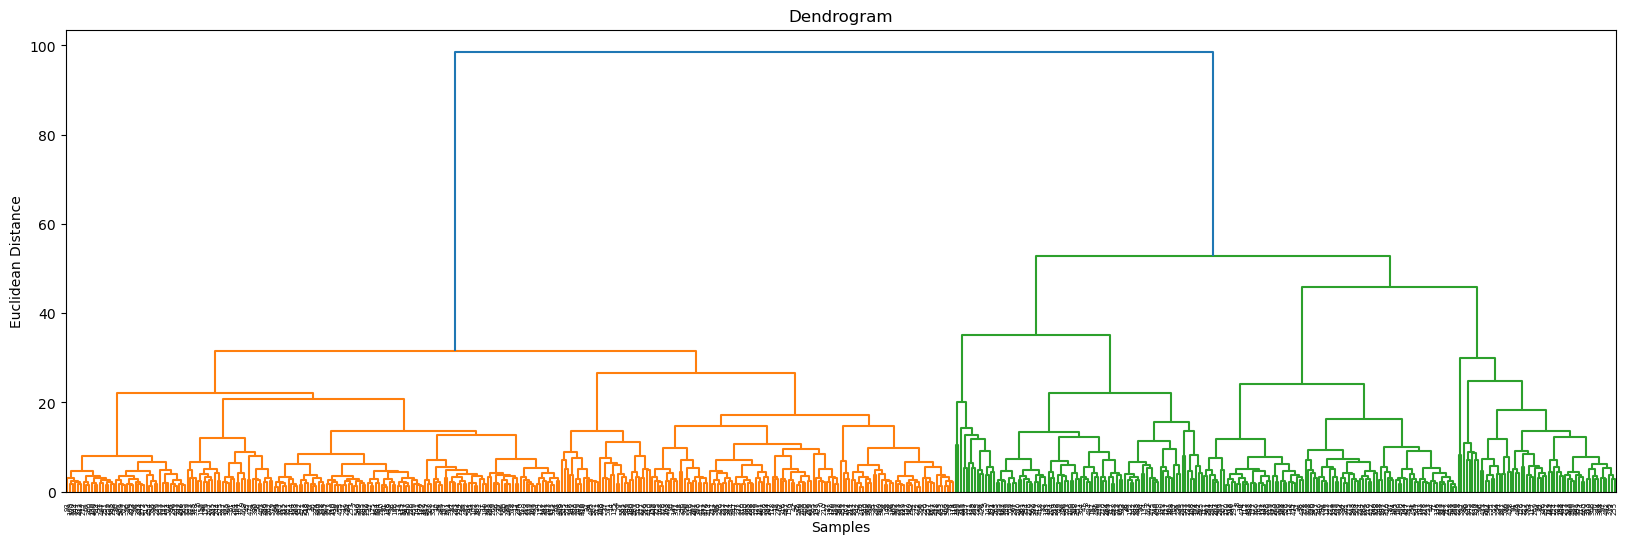

In [10]:
# Plot dendrogram
plt.figure(figsize=(20, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()